In [345]:
import warnings
warnings.filterwarnings("ignore") 
import time
import pandas as pd
import pandas_datareader.data as web
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline

In [346]:
mu1, mu2, mu3, mu4, sigma = 2, 4, 6, 8, 0.25
s1 = np.random.normal(mu1, sigma, 50)
s2 = np.random.normal(mu2, sigma, 50)
s3 = np.random.normal(mu3, sigma, 50)
s4 = np.random.normal(mu4, sigma, 50)
s12 = np.concatenate((s1, s2), axis=0)
s34 = np.concatenate((s3, s4), axis=0)
s = np.concatenate((s12, s34), axis=0)

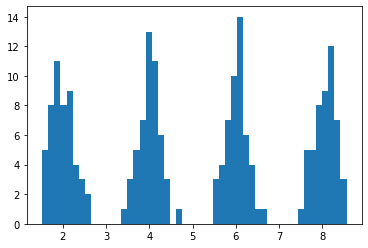

In [347]:
import matplotlib.pyplot as plt
plt.hist(s, bins=50)
plt.show()


In [348]:
# Gaussian Similarity
#  s(xi , xj ) = exp(−|xi − xj|^2/(2σ^2)) with σ = 1
import math
def Gaussian_Similarity(xi, xj, sigma):
    exponent = pow(abs(xi - xj),2) / (2 * pow(sigma, 2))
    return math.exp(-exponent)

def Gaussian_Sim_All(xArray, sigma):
    resultMatrix = []
    for i in range(len(xArray)):
        ithRow = []
        for j in range(len(xArray)):
            ithRow.append(Gaussian_Similarity(xArray[i], xArray[j], sigma))
        resultMatrix.append(ithRow)
    return resultMatrix

In [349]:
similarityResult = Gaussian_Sim_All(s, 1)

In [350]:
similarityResult = np.array(similarityResult)

In [351]:
similarityResult.shape

(200, 200)

In [352]:
similarityResult[:5,:5]

array([[1.        , 0.96109619, 0.96332315, 0.97810647, 0.85786113],
       [0.96109619, 1.        , 0.99996523, 0.99746144, 0.96367692],
       [0.96332315, 0.99996523, 1.        , 0.99801997, 0.96145993],
       [0.97810647, 0.99746144, 0.99801997, 1.        , 0.94276689],
       [0.85786113, 0.96367692, 0.96145993, 0.94276689, 1.        ]])

In [353]:
def D_matrix(sim_matrix):
    result = []
    for i in range(len(sim_matrix)):
        line = []
        for j in range(len(sim_matrix)):
            if i == j:
                t = sum(sim_matrix[i])
                line.append(t)
            else:
                line.append(0)
        result.append(line)
    result = np.array(result)
    return np.array(result)

In [354]:
def Spec_Cluster(W, cluster_count, method):
    if method == "unnormalized":
        #D_values = [sum(sim_matrix[i]) for i in range(len(sim_matrix))]
        D = D_matrix(W)
        L = D - W
        e, v = np.linalg.eig(L)
        U = []
        for i in range(cluster_count):
            U.append(v[i])
        U = np.transpose(U)
        C = []
        for i in range(len(W)):
            yi = U[i].reshape(-1, 1)
#            print(f"[{i}] - {yi}")
            km = KMeans(n_clusters=cluster_count)
            km.fit(yi)
            C.append(km.labels_[0])
    
        smallest_k = np.where(e == np.partition(e, cluster_count))[0][:cluster_count]
        
        return C, smallest_k, U
        
    else:
        pass

In [375]:
cluster_count = 10

In [376]:
clusters, evals, evects = np.array(Spec_Cluster(similarityResult, cluster_count, "unnormalized"))

In [377]:
clusters = np.array(clusters)
evals = np.array(evals)
evects = np.array(evects)


In [378]:
clusters.shape

(200,)

In [379]:
evals.shape

(10,)

In [380]:
evects.shape

(200, 10)

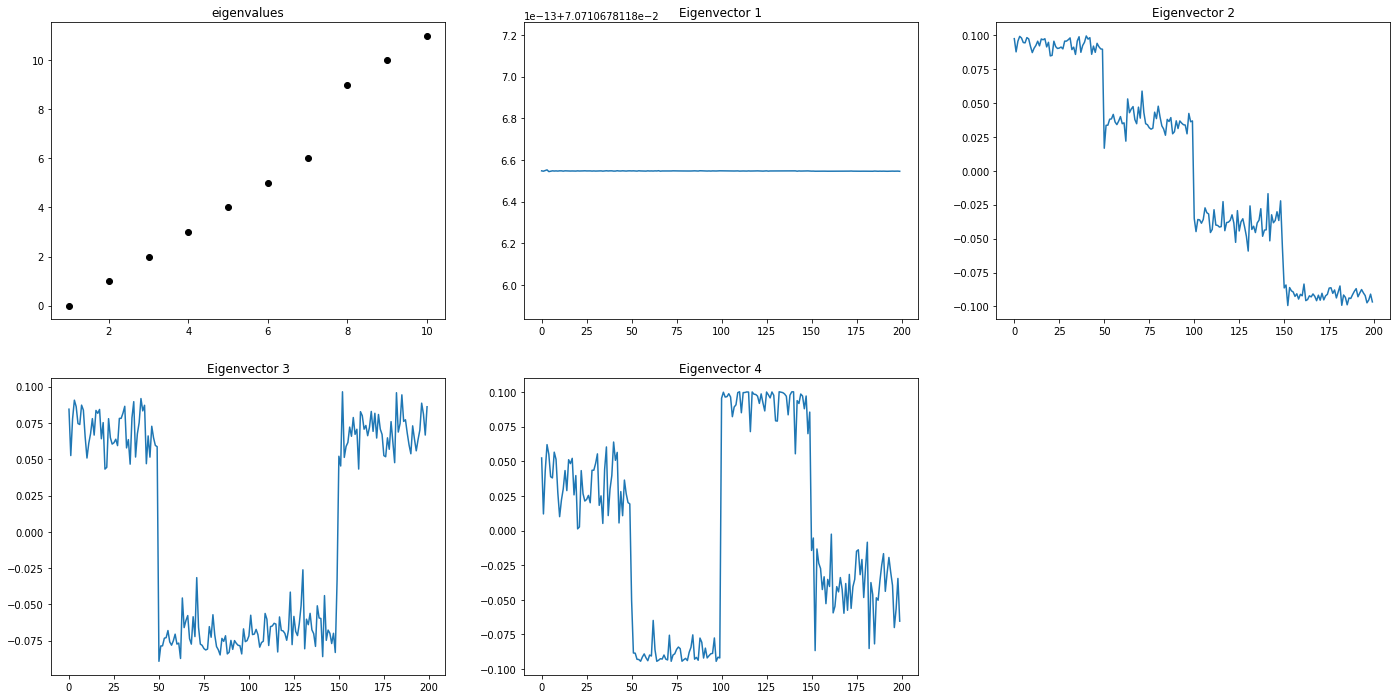

In [381]:
fig = plt.figure(figsize=[24, 12])
ax1 = plt.subplot(231)
x_side = [i+1 for i in range(cluster_count)]
plt.plot(x_side, evals, 'o', color='black');
ax1.title.set_text('eigenvalues')
i = evals.astype(int)
ax2 = plt.subplot(232)
plt.plot(v[:, i[0]])
ax2.title.set_text('Eigenvector 1')
ax3 = plt.subplot(233)
plt.plot(v[:, i[1]])
ax3.title.set_text('Eigenvector 2')
ax4 = plt.subplot(234)
plt.plot(v[:, i[2]])
ax4.title.set_text('Eigenvector 3')
ax5 = plt.subplot(235)
plt.plot(v[:, i[3]])
ax5.title.set_text('Eigenvector 4')